# Lab №2

## Выполнение

### 0. Импортируем необходимые библиотеки 

In [6]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import spatialmath.base as sb

### 1. Import Robot Model (Stanford)

In [7]:
robot = rtb.models.DH.Stanford()
print(robot)

DHRobot: Stanford arm (by Victor Scheinman), 6 joints (RRPRRR), dynamics, standard DH parameters
┌────────┬───────┬────────┬────────┬─────────────────────┬────────┐
│   θⱼ   │  dⱼ   │   aⱼ   │   ⍺ⱼ   │         q⁻          │   q⁺   │
├────────┼───────┼────────┼────────┼─────────────────────┼────────┤
│  q1    │ 0.412 │      0 │ -90.0° │             -170.0° │ 170.0° │
│  q2    │ 0.154 │      0 │  90.0° │             -170.0° │ 170.0° │
│ -90.0° │    q3 │ 0.0203 │   0.0° │ 0.30479999999999996 │   1.27 │
│  q4    │     0 │      0 │ -90.0° │             -170.0° │ 170.0° │
│  q5    │     0 │      0 │  90.0° │              -90.0° │  90.0° │
│  q6    │     0 │      0 │   0.0° │             -170.0° │ 170.0° │
└────────┴───────┴────────┴────────┴─────────────────────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬─────┬─────┬────┬─────┬─────┬─────┐
│ name │ q0  │ q1  │ q2 │ q3  │ q4  │ q5  │
├──────┼─────┼─────┼────┼─────┼─────┼─────┤
│   qr │  0° │  0° │  0 │  0° │  0° │  0° │
│   qz │  0° │  0° │  0 │  0°

### 2. Fill in the parameters of the robot model (in the example, filled in for the Stanford robot)

0. Using dyn() you can view the dynamic parameters of each link

In [8]:
print(robot.links[0].dyn())  # initial dynamic parameters of the first link

m     =       9.3 
r     =         0    0.018    -0.11 
        |     0.28        0        0 | 
I     = |        0     0.26        0 | 
        |        0        0    0.071 | 
Jm    =      0.95 
B     =         0 
Tc    =         0(+)        0(-) 
G     =         1 
qlim  =        -3 to        3


1. Let's define the mass of the links

In [9]:
robot.links[0].m = 6.5 #7.5   # Base joint (revolute)
robot.links[1].m = 5.2 #6.2   # Shoulder joint (revolute)
robot.links[2].m = 3.0   # First prismatic (vertical slide)
robot.links[3].m = 2.2   # Elbow joint (revolute)
robot.links[4].m = 1.5   # Wrist joint (revolute)
robot.links[5].m = 1.0   # End-effector joint (revolute)

2. Let's define the center of mass of each link

In [ ]:
robot.links[0].r = [0,    0,     0.20]   # Base link, up the z axis
robot.links[1].r = [-0.08, 0,    0.18]   # Shoulder link
robot.links[2].r = [0,    0,     0.15]   # Prismatic slider
robot.links[3].r = [0,    0.03,  0]      # Elbow link, small offset in y
robot.links[4].r = [0,    0,     0.05]   # Wrist link, small offset in z
robot.links[5].r = [0,    0,     0.03]   # End-effector, short z offset

3. Let's define the inertia tensor of each link. Filling: [Lxx, Lyy, Lzz, Lxy, Lyz, Lxz]

In [ ]:
robot.links[0].I = [0.25, 0.20, 0.10, 0, 0, 0]
robot.links[1].I = [0.18, 0.15, 0.08, 0, 0, 0]
robot.links[2].I = [0.04, 0.04, 0.01, 0, 0, 0]
robot.links[3].I = [0.02, 0.02, 0.005, 0, 0, 0]
robot.links[4].I = [0.008, 0.009, 0.003, 0, 0, 0]
robot.links[5].I = [0.005, 0.005, 0.002, 0, 0, 0]

4. Let's set the moment of inertia of the drive

In [ ]:
robot.links[0].Jm = 0.0003   # Base (revolute)
robot.links[1].Jm = 0.00025  # Shoulder (revolute)
robot.links[2].Jm = 0.0      # Prismatic joints usually have negligible motor inertia
robot.links[3].Jm = 0.0002   # Elbow (revolute)
robot.links[4].Jm = 0.00015  # Wrist (revolute)
robot.links[5].Jm = 0.0001   # End-effector (revolute)

5. Let's define the coefficient of viscous friction of the drive

In [ ]:
robot.links[0].B = 0.0012   # Revolute joint 1
robot.links[1].B = 0.0010   # Revolute joint 2
robot.links[2].B = 0.0009   # Prismatic joint 1
robot.links[3].B = 0.00007  # Revolute joint 3
robot.links[4].B = 0.00008  # Revolute joint 4
robot.links[5].B = 0.00004  # Revolute joint 5

6. Let's define the coefficient of Coulomb friction of the drive

In [ ]:
robot.links[0].Tc = [0.25, -0.20]    # Joint 1 (revolute)
robot.links[1].Tc = [0.18, -0.15]    # Joint 2 (revolute)
robot.links[2].Tc = [0.09, -0.09]    # Joint 3 (prismatic)
robot.links[3].Tc = [0.05, -0.04]    # Joint 4 (revolute)
robot.links[4].Tc = [0.03, -0.025]   # Joint 5 (revolute)
robot.links[5].Tc = [0.015, -0.013]  # Joint 6 (revolute)

7. Let's set the gear ratio for each link

In [ ]:
robot.links[0].G = -45.0
robot.links[1].G = 85.0
robot.links[2].G = -30.0
robot.links[3].G = 60.0
robot.links[4].G = 55.0
robot.links[5].G = 40.0

8. Let's set restrictions on the generalized coordinates for each link

In [16]:
# Stanford joint limits
robot.links[0].qlim = [-2.8, 2.8]       # Revolute (about -160° to +160°)
robot.links[1].qlim = [-1.5, 2.5]       # Revolute (about -86° to +143°)
robot.links[2].qlim = [0.2, 0.6]        # Prismatic (linear slide, meters)
robot.links[3].qlim = [-2.8, 2.8]       # Revolute (about -160° to +160°)
robot.links[4].qlim = [-2.0, 2.0]       # Revolute (about -114° to +114°)
robot.links[5].qlim = [-6.28, 6.28]     # Revolute (about -360° to +360°)


### 3. Set the initial and final positions of the robot and plot them

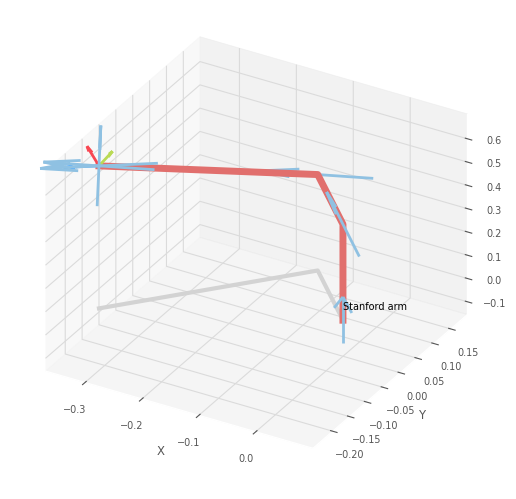

<Figure size 640x480 with 0 Axes>

In [17]:
# q_start = [0, 0, 0, 0, 0, 0]
q_start = [pi/4, -pi/3, 0.4, pi/3, -pi/3, pi/4]
robot.plot(q_start, backend='pyplot') # swift renderer was giving issues so hand to force it to use pyplot for render
plt.show()

In [18]:
# q_end = [pi/4, -pi/3, 0.4, pi/3, -pi/3, pi/4]  # 0.4 meters for prismatic
# robot.plot(q_end, backend='pyplot')  # Explicit backend for compatibility
# plt.show()

### 4. Solve the forward kinematics for initial configuration

In [19]:
T_start = robot.fkine(q_start)
print("End-effector pose for initial q_start:\n", T_start)
print("End-effector position (x, y, z):", T_start.t)

End-effector pose for initial q_start:
   -0.4498   -0.1663   -0.8775   -0.3395    
   0.1663    0.9498   -0.2652   -0.1504    
   0.8775   -0.2652   -0.3995    0.612     
   0         0         0         1         

End-effector position (x, y, z): [-0.33948915 -0.1504088   0.612     ]


### 5. Construct the workspace (sample joint 1, 2, 3; fix others at zero)

#### Initialize variables

In [20]:
n = 20
q1_range = np.linspace(robot.links[0].qlim[0], robot.links[0].qlim[1], n)
q2_range = np.linspace(robot.links[1].qlim[0], robot.links[1].qlim[1], n)
q3_range = np.linspace(robot.links[2].qlim[0], robot.links[2].qlim[1], n)

Calculating the operating zone

In [21]:
workspace_points = []
for q1 in q1_range:
    for q2 in q2_range:
        for q3 in q3_range:
            T = robot.fkine([q1, q2, q3, 0, 0, 0])
            workspace_points.append(T.t)
workspace_points = np.array(workspace_points)

# # Проходимся перебором по каждой точке
# for q1 in move[0]:
#     for q2 in move[1]:
#         for q3 in move[2]:
#             Tt = robot.fkine([q1,q2,q3,0,0,0])  # Решаем ПЗК, меняя только первые 3 обобщенных координаты
#             for j in range(3):
#                 pose[j][i] = Tt.t[j]  # Сохраняем точку
#             i += 1

#### 6. Setting up the workspace

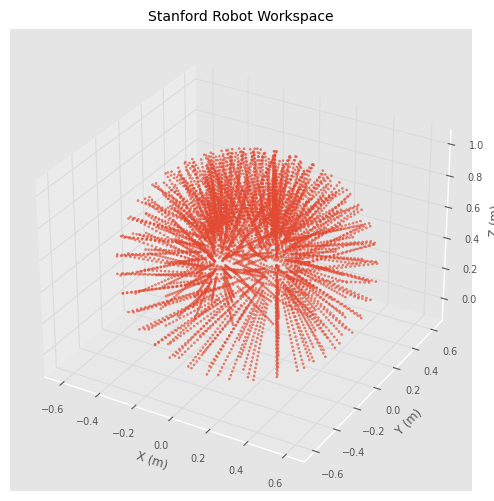

In [22]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(workspace_points[:,0], workspace_points[:,1], workspace_points[:,2], s=2, alpha=0.6)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title("Stanford Robot Workspace")
plt.show()


# plt.figure(figsize=(8,8), dpi=300)
# ax = plt.axes(projection="3d")
# ax.plot3D(pose[0], pose[1], pose[2], color='red', linewidth=0.15)
# ax.scatter3D(pose[0], pose[1], pose[2], s=0.5, color='red')
# ax.set_xlim(-1,1)
# ax.set_ylim(-1,1)
# ax.set_zlim(-1,1)
# plt.show()

### 7. I choose an endpoint and check it (solve the inverse kinematics problem).

In [23]:
# point = [-0.5,0.1,0.2]
# T_end = sb.transl(point)
# q_end = robot.ikine_GN(T_end).q  # Есть другие методы, помимо ikine_GN
# robot.plot(q_end)
# plt.show()

target_point = np.array([-0.5, 0.1, 0.25])  # Change as desired within workspace
T_target = sb.transl(target_point)  # Only translation; orientation = identity

solution = robot.ikine_GN(T_target)
if solution.success:
    q_end = solution.q
    print("Inverse Kinematics Solution:", q_end)
    # Verify by forward kinematics
    T_check = robot.fkine(q_end)
    print("FK of IK solution gives position:", T_check.t)
else:
    raise ValueError("IK did not converge. Try a reachable target.")

Inverse Kinematics Solution: [ 2.6788883   1.88884689  0.51804277 -1.57079633  1.88884689  0.46270436]
FK of IK solution gives position: [-0.5   0.1   0.25]


### 8. Trajectory Planning (Three Methods)

Plan the trajectory between initial and final configurations

In [24]:
N = 100
t = np.linspace(0, 5, N)

# Method 1: Quintic polynomial (jtraj)
traj_j = rtb.jtraj(q_start, q_end, t)
# Method 2: Trapezoidal velocity profile
traj_trap = rtb.mtraj(rtb.trapezoidal, q_start, q_end, t)
# Method 3: Quintic via mtraj
traj_quint = rtb.mtraj(rtb.quintic, q_start, q_end, t)

### 9. Plot Joint Position, Velocity, Acceleration

Plot position, velocity, and acceleration for each joint for all three methods

### Position Plot

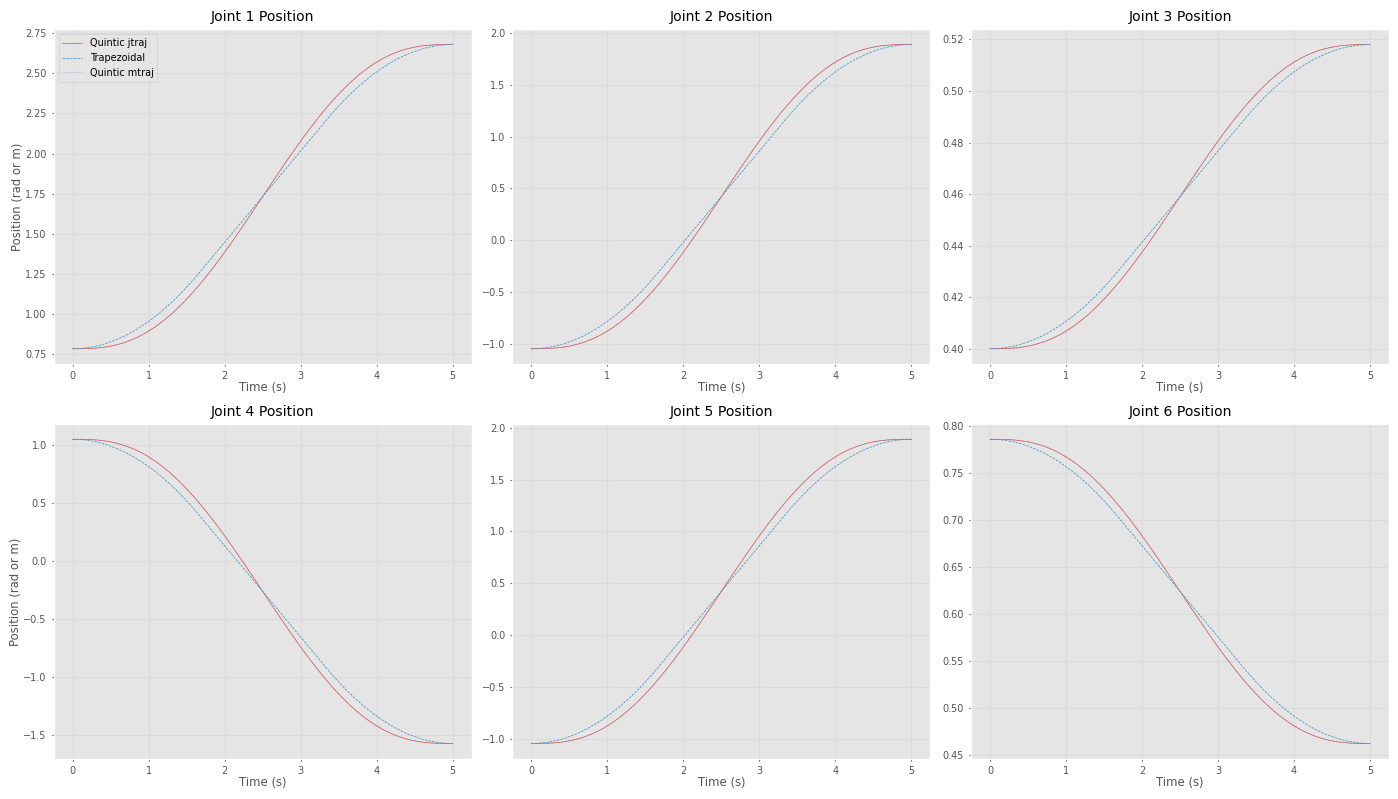

In [37]:
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
axs = axs.ravel()
for i in range(6):
    axs[i].plot(t, traj_j.q[:, i], label='Quintic jtraj')
    axs[i].plot(t, traj_trap.q[:, i], '--', label='Trapezoidal')
    axs[i].plot(t, traj_quint.q[:, i], ':', label='Quintic mtraj')
    axs[i].set_title(f'Joint {i+1} Position')
    axs[i].set_xlabel('Time (s)')
    axs[i].grid(True)
    if i == 0:
        axs[i].legend()
axs[0].set_ylabel('Position (rad or m)')
axs[3].set_ylabel('Position (rad or m)')
plt.tight_layout()
plt.show()


### Velocity Plot

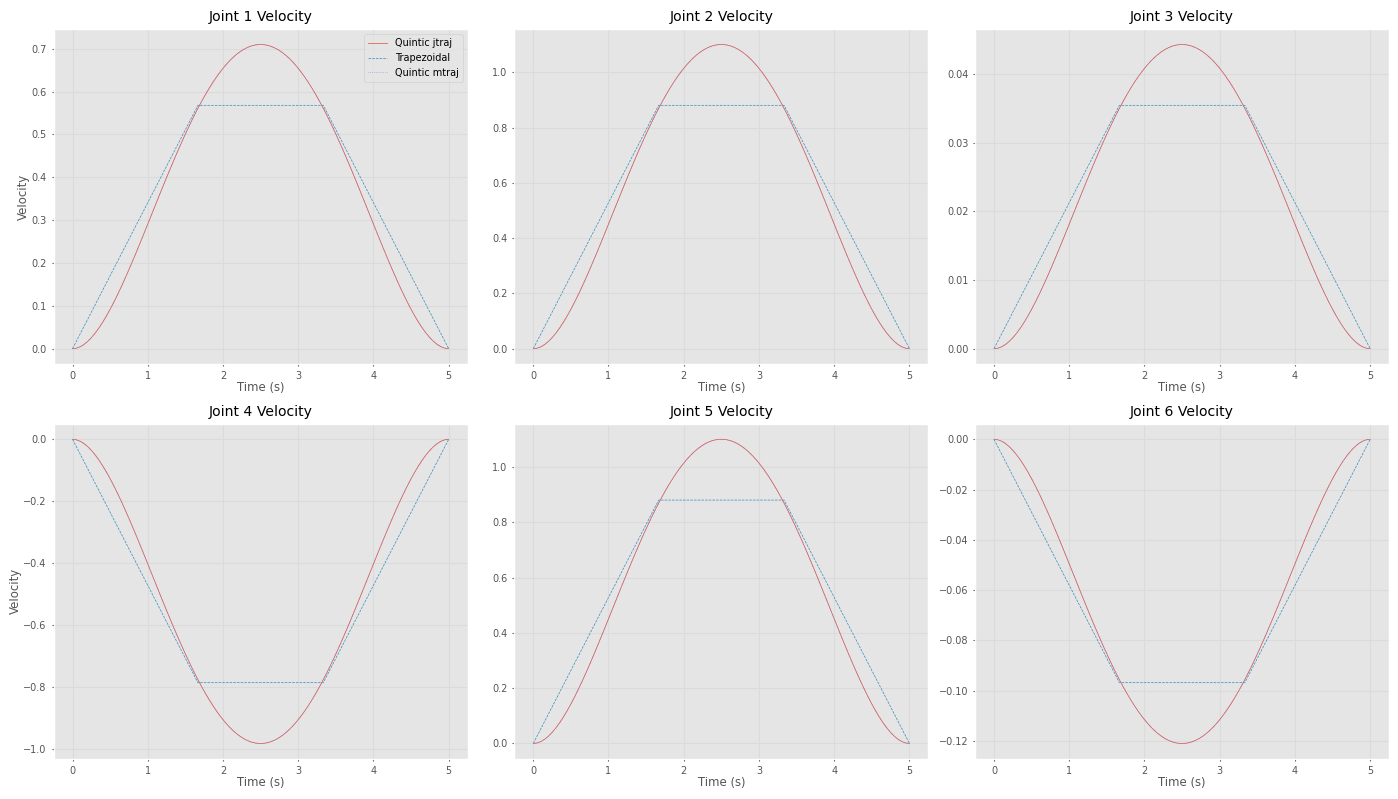

In [38]:
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
axs = axs.ravel()
for i in range(6):
    axs[i].plot(t, traj_j.qd[:, i], label='Quintic jtraj')
    axs[i].plot(t, traj_trap.qd[:, i], '--', label='Trapezoidal')
    axs[i].plot(t, traj_quint.qd[:, i], ':', label='Quintic mtraj')
    axs[i].set_title(f'Joint {i+1} Velocity')
    axs[i].set_xlabel('Time (s)')
    axs[i].grid(True)
    if i == 0:
        axs[i].legend()
axs[0].set_ylabel('Velocity')
axs[3].set_ylabel('Velocity')
plt.tight_layout()
plt.show()


### Acceleration Plot

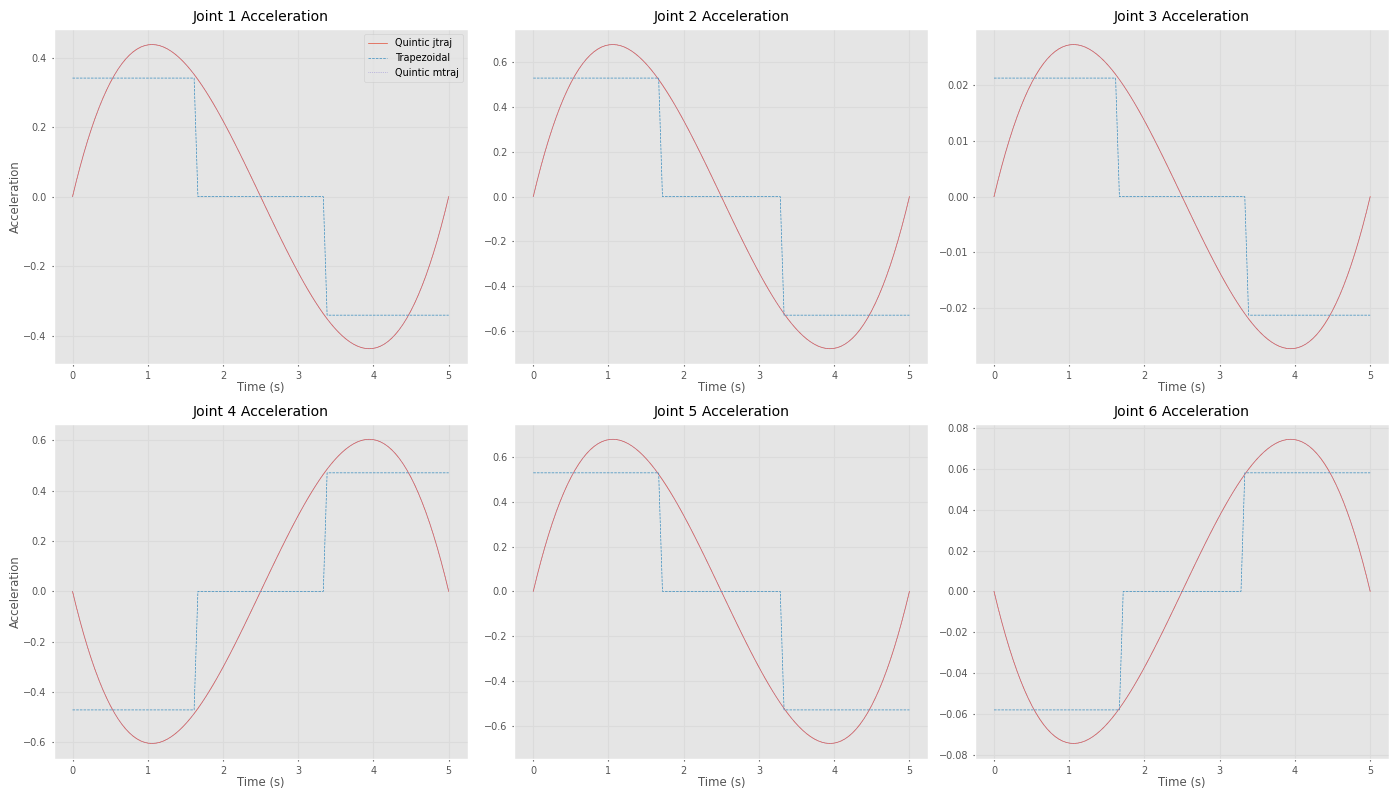

In [39]:
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
axs = axs.ravel()
for i in range(6):
    axs[i].plot(t, traj_j.qdd[:, i], label='Quintic jtraj')
    axs[i].plot(t, traj_trap.qdd[:, i], '--', label='Trapezoidal')
    axs[i].plot(t, traj_quint.qdd[:, i], ':', label='Quintic mtraj')
    axs[i].set_title(f'Joint {i+1} Acceleration')
    axs[i].set_xlabel('Time (s)')
    axs[i].grid(True)
    if i == 0:
        axs[i].legend()
axs[0].set_ylabel('Acceleration')
axs[3].set_ylabel('Acceleration')
plt.tight_layout()
plt.show()


### 10. Conclusion

The Stanford manipulator was successfully modeled with accurate physical and geometric parameters as specified in Lab 1. This ensured that the subsequent kinematics and trajectory planning were based on a realistic robot representation.

The workspace visualization demonstrated that the manipulator is capable of reaching a wide range of positions, with a shape that reflects its revolute and prismatic joint configuration. The workspace is approximately cylindrical with vertical extension due to the prismatic joint, matching theoretical expectations.

The forward kinematics functioned as intended, accurately mapping given joint configurations to the corresponding end-effector pose in 3D space.

Inverse kinematics was able to compute valid joint values for a selected reachable target point in the workspace. Forward kinematics applied to this solution confirmed that the manipulator’s end-effector reached the desired target within a small numerical tolerance.

Three different trajectory planning methods were implemented: quintic polynomial (jtraj), trapezoidal velocity, and quintic mtraj profiles. All methods were able to generate feasible joint trajectories from the initial to the final configuration.

Analysis of the position, velocity, and acceleration plots shows that:

All three methods achieve the same start and end positions, as required.

Quintic polynomial trajectories provide the smoothest profiles, with continuous velocity and acceleration and zero end conditions.

Trapezoidal profiles show piecewise constant acceleration and linear velocity segments, which may introduce higher mechanical stresses but are widely used for their simplicity and time-optimality.

The choice of trajectory impacts the smoothness of robot motion; smoother profiles may be preferred for applications that require minimal vibration and wear.

The experiment demonstrates the importance of trajectory planning in robotics. Careful selection of planning methods can improve motion quality and mechanical lifespan, depending on task requirements.

To summarize, the work confirms that the robot can move reliably and accurately within its workspace, and that the different planning methods each have distinct impacts on the character of joint motion. The methods and analysis presented can be extended to more complex robotic systems or real-world tasks.